For the starting I am going to import some libraries for the processing of the dataset

In [534]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

In [535]:
import warnings
#remove any warnings
warnings.filterwarnings('ignore')

In [536]:
#install ucimlrepo
!pip install ucimlrepo

Since the dataset was a zip file downloaded from UCI repository. I extracted it to a file and upload in the google drive. But it was a different file so I am just using the import python from the site. directly loading to the google colab.

In [537]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
data_chronic_kidney = fetch_ucirepo(id=336)

# data as pandas dataframes
X_kidney = data_chronic_kidney.data.features
y_kidney = data_chronic_kidney.data.targets

# metadata
print(data_chronic_kidney.metadata)

# variable information
print(data_chronic_kidney.variables)

#print X_kidney
print(X_kidney)

#print the target variables
print(y_kidney)



{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [538]:
#print X_kidney
print(X_kidney)

      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet

Checking for missing values

In [539]:
#print missing values
X_miss_kid = X_kidney.isnull().sum()
print(X_miss_kid)

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


It have missing values

EXPLORATORY DATA ANALYSIS

In [540]:
#printing missing values
Y_miss_kid = y_kidney.isnull().sum()
print(Y_miss_kid)

class    0
dtype: int64


Since the target varible doesnt have any null values we dont require to drop nan

Next i am going to find the summary statistics of the data

In [541]:
#print the summary statistics of the data
X_kidney.describe()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [542]:
#check the shape of the data
X_kidney.shape

(400, 24)

In [543]:
#check the columns of the data
X_kidney.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [544]:
#check the dtype of the data
X_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

Since this is a mixed dtypes we have to change the object to numeric as these contains normal or abnormal.

In [545]:
#check for duplicates
X_kidney.duplicated().sum()

0

There is no duplicates

In [546]:
#check the info the class column
y_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   400 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [547]:
#printing the target class
print(y_kidney['class'])

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: class, Length: 400, dtype: object


In [548]:
# Check for unique values in the target variable
print(y_kidney['class'].unique())


['ckd' 'ckd\t' 'notckd']


In [549]:
print(X_kidney['cad'].unique())

['no' 'yes' nan]


In [550]:
print(X_kidney['rbc'].unique())

[nan 'normal' 'abnormal']


In [551]:
# Replace 'ckd\t' with 'ckd'
y_kidney['class'] = y_kidney['class'].replace('ckd\t', 'ckd')

# Verify the replacement
print(y_kidney['class'].unique())


['ckd' 'notckd']


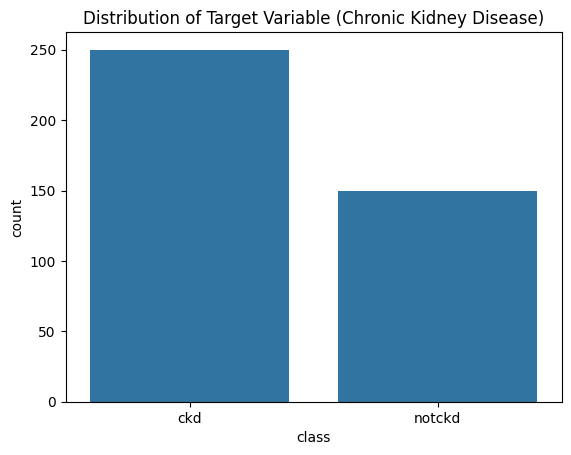

In [552]:
# Plot distribution of target variable (class column in y_kidney)
sns.countplot(x=y_kidney['class'])
plt.title("Distribution of Target Variable (Chronic Kidney Disease)")
plt.show()


class
ckd       250
notckd    150
Name: count, dtype: int64


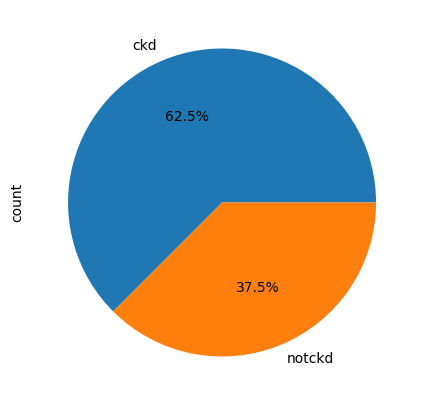

In [553]:
# Plot pie chart
plot_df = y_kidney['class'].value_counts()
print(plot_df)
plot_df.plot(kind="pie", autopct='%1.1f%%', figsize=(5, 5), title='')
plt.show()


In [554]:
# Separate numerical and categorical features
numerical_features = X_kidney.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_kidney.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
Categorical Features: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


<Figure size 1500x1000 with 0 Axes>

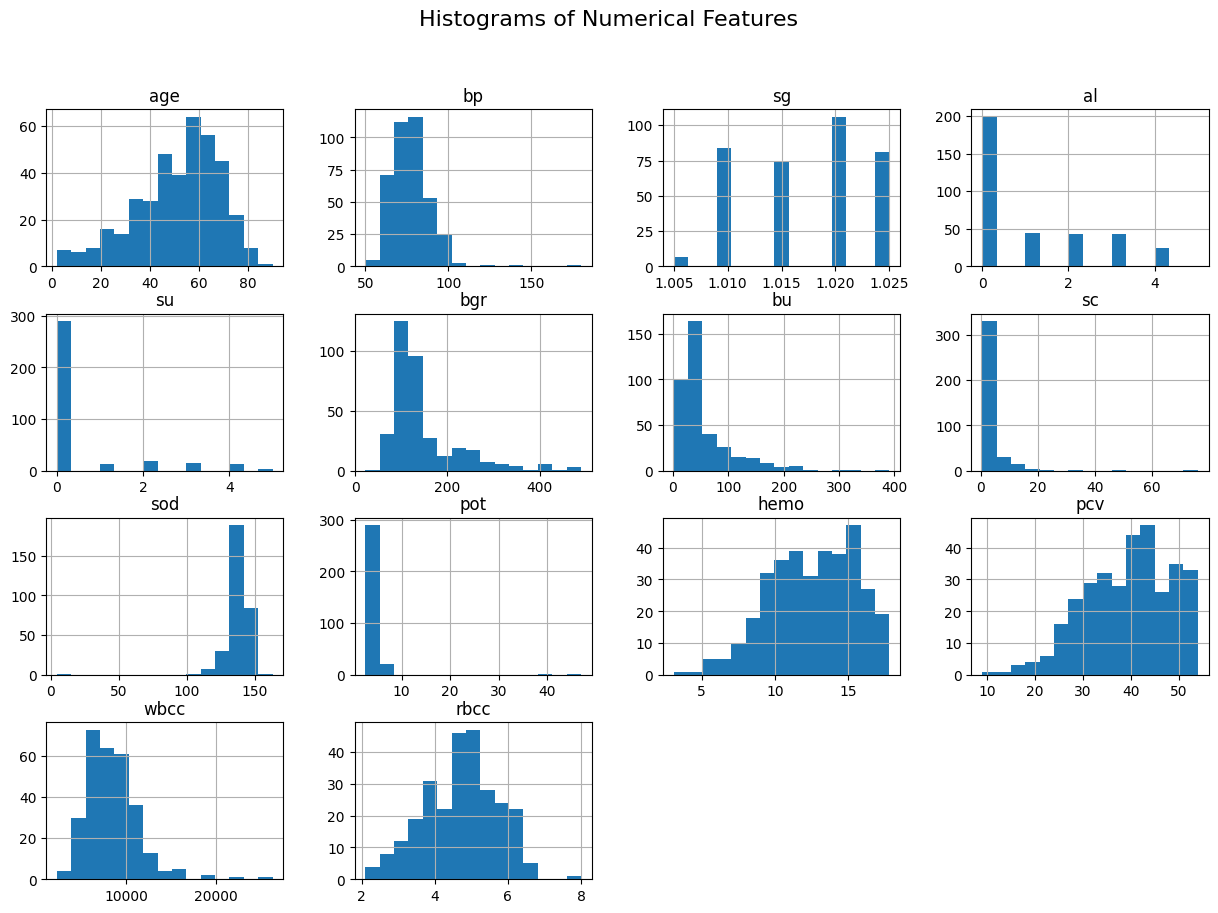

In [555]:
#plot histogram of numerical features
plt.figure(figsize=(15, 10))
X_kidney[numerical_features].hist(bins=15, layout=(4, 4), figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

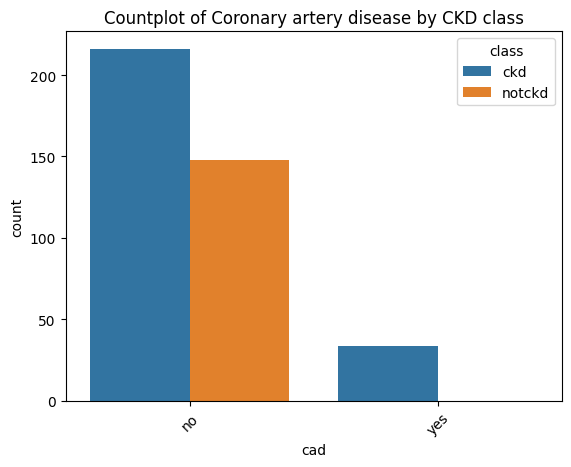

In [556]:
#Example of the countplot
plt.figure()
sns.countplot(x = X_kidney['cad'], hue = y_kidney['class'])
plt.title("Countplot of Coronary artery disease by CKD class")
plt.xticks(rotation=45)
plt.show()

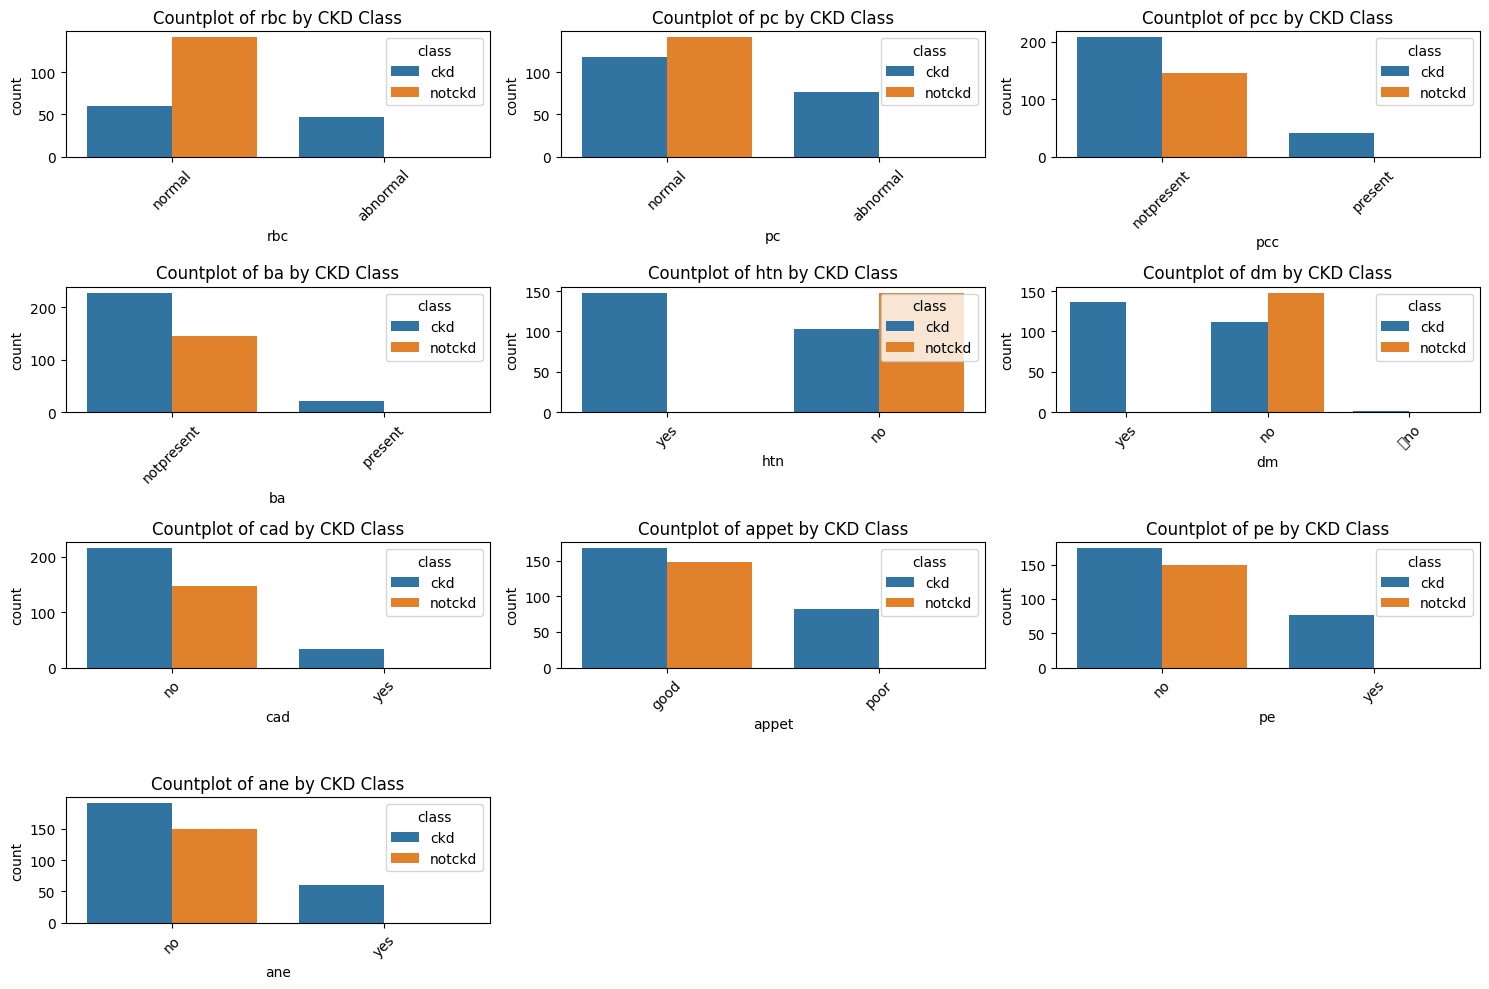

In [557]:
# Plot count plots for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 3, i + 1) #4 rows , 3 columns
    sns.countplot(x=X_kidney[feature], hue=y_kidney['class'])
    plt.title(f"Countplot of {feature} by CKD Class")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [558]:
# Check the unique values in the 'dm' column (diabetics)
dm_values = X_kidney['dm'].unique()
print("Unique values in 'dm' column:", dm_values)


Unique values in 'dm' column: ['yes' 'no' '\tno' nan]


In [559]:
# Replace '\tno' with 'no' in the 'dm' column
X_kidney['dm'] = X_kidney['dm'].replace('\tno', 'no')



In [560]:
print(X_kidney['dm'].unique())

['yes' 'no' nan]


In [561]:
# Find lengths of numerical and categorical features
num_length = len(numerical_features)
cat_length = len(categorical_features)

print("Number of Numerical Features:", num_length)
print("Number of Categorical Features:", cat_length)


Number of Numerical Features: 14
Number of Categorical Features: 10


In [562]:
# Descriptive statistics for numerical features
numerical_description = X_kidney[numerical_features].describe()
print("Descriptive Statistics for Numerical Features:")
print(numerical_description)

# Descriptive statistics for categorical features
categorical_description = {}
for feature in categorical_features:
    categorical_description[feature] = X_kidney[feature].value_counts()

print("\nDescriptive Statistics for Categorical Features:")
for feature, counts in categorical_description.items():
    print(f"\n{feature}:")
    print(counts)


Descriptive Statistics for Numerical Features:
              age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  381.000000  383.000000  313.000000  312.000000  348.000000  329.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.52

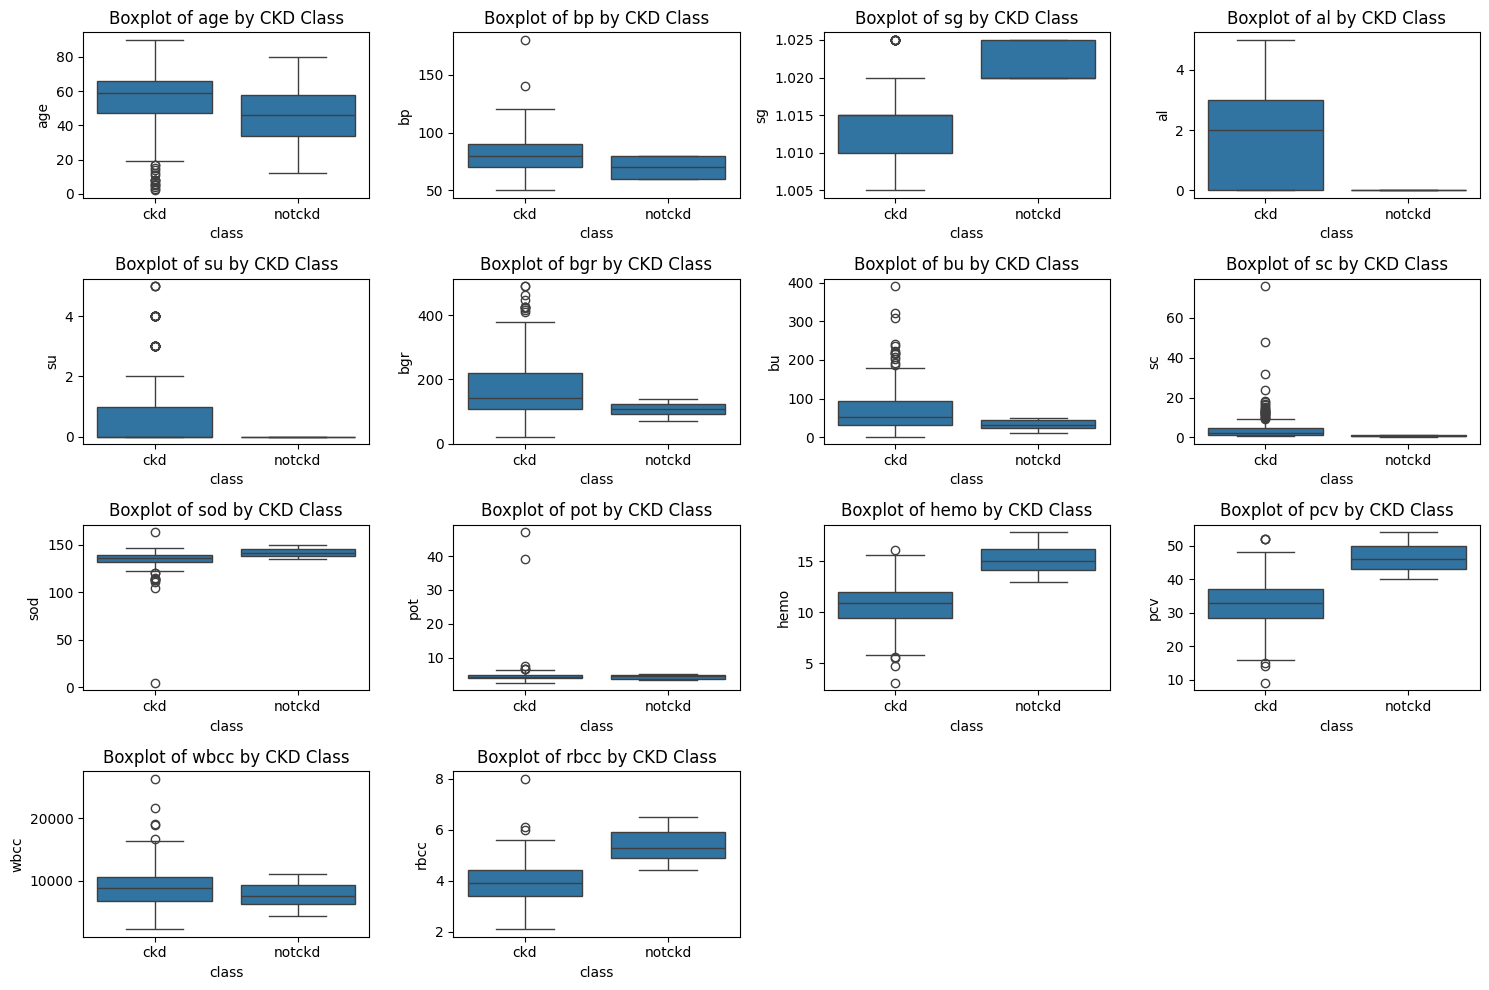

In [563]:
#box plot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=y_kidney['class'], y=X_kidney[feature])
    plt.title(f"Boxplot of {feature} by CKD Class")
plt.tight_layout()
plt.show()


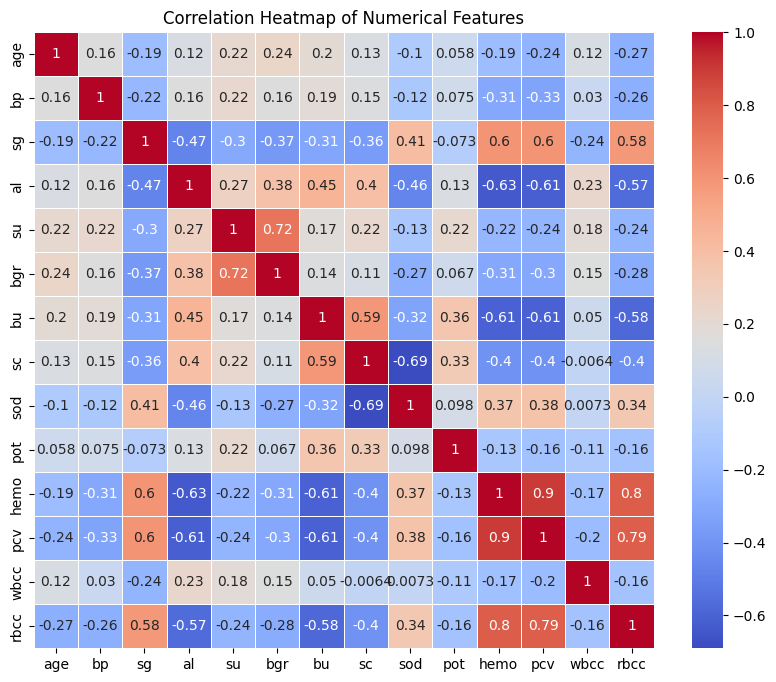

In [564]:
# Correlation matrix
corr_matrix = X_kidney[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


su (sugar) and al (albumin) → Correlation: 0.72 (positive correlation)
bu (blood urea) and sc (serum creatinine) → Correlation: 0.59 (moderate but noteworthy)
hemo (hemoglobin) and pcv (packed cell volume) → Correlation: 0.91 (positive correlation)
hemo (hemoglobin) and rbcc (red blood cell count) → Correlation: 0.79 (positive correlation)
pcv (packed cell volume) and rbcc (red blood cell count) → Correlation: 0.79 (positive correlation)

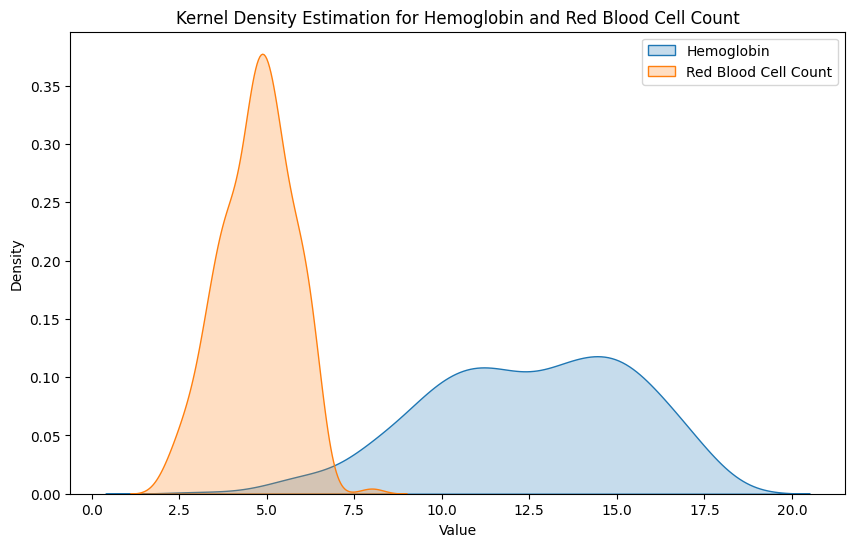

In [565]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=X_kidney, x='hemo', label='Hemoglobin', fill=True)
sns.kdeplot(data=X_kidney, x='rbcc', label='Red Blood Cell Count', fill=True)
plt.title("Kernel Density Estimation for Hemoglobin and Red Blood Cell Count")
plt.xlabel("Value")
plt.legend()
plt.show()

This **KDE plot** compares the distributions of **Hemoglobin** (blue) and **Red Blood Cell Count** (orange) in CKD patients:

- **Hemoglobin** shows a broader range, peaking between **10-15 g/dL**, indicating more variability in anemia severity.
- **RBC Count** has a sharp peak around **5 million cells**, showing less variation.
- Minimal overlap suggests independent variation between the two.

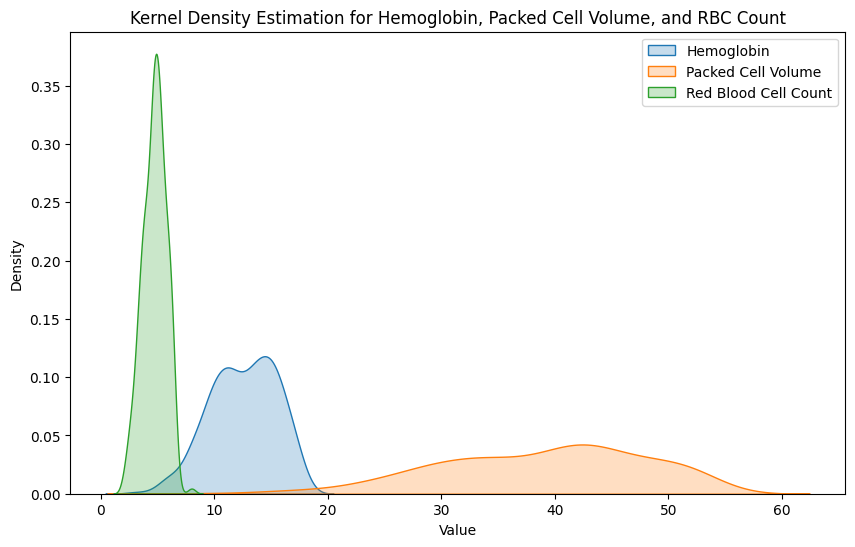

In [566]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=X_kidney, x='hemo', label='Hemoglobin', fill=True)
sns.kdeplot(data=X_kidney, x='pcv', label='Packed Cell Volume', fill=True)
sns.kdeplot(data=X_kidney, x='rbcc', label='Red Blood Cell Count', fill=True)
plt.title("Kernel Density Estimation for Hemoglobin, Packed Cell Volume, and RBC Count")
plt.xlabel("Value")
plt.legend()
plt.show()

This **KDE plot** compares **Hemoglobin** (blue), **Packed Cell Volume (PCV)** (orange), and **Red Blood Cell Count (RBC)** (green):

- **RBC** peaks sharply near **5 million cells/µL**, indicating little variation.
- **Hemoglobin** shows more variation, peaking around **10-15 g/dL**, typical of anemia in CKD.
- **PCV** has a broader range, peaking between **40-50%**, reflecting different severities in CKD patients.

Minimal overlap between PCV and RBC shows they are less correlated, while Hemoglobin and PCV are more linked, often associated with anemia in CKD.

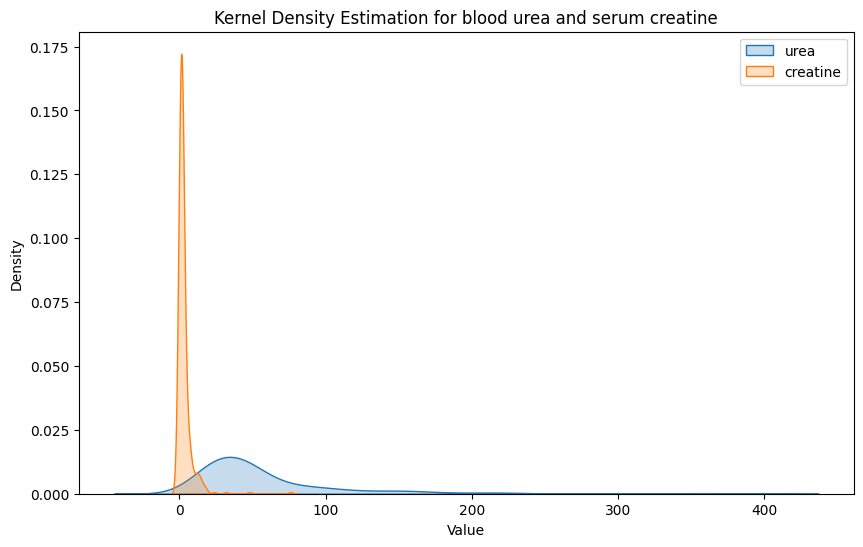

In [567]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=X_kidney, x='bu', label='urea', fill=True)
sns.kdeplot(data=X_kidney, x='sc', label='creatine', fill=True)
plt.title("Kernel Density Estimation for blood urea and serum creatine")
plt.xlabel("Value")
plt.legend()
plt.show()

This KDE plot compares **blood urea** (blue) and **serum creatinine** (orange):

- **Serum creatinine** has a sharp peak near **0** with most values concentrated below **10 mg/dL**, indicating less variation but higher density.
- **Blood urea** shows a broader distribution with values spread out, including some above **100 mg/dL**, suggesting more variability in the dataset.

The long tails indicate outliers for both, particularly for **urea**, which can be elevated in severe chronic kidney disease (CKD) cases. This distribution reflects that most patients have lower serum creatinine but a wider range of blood urea levels.

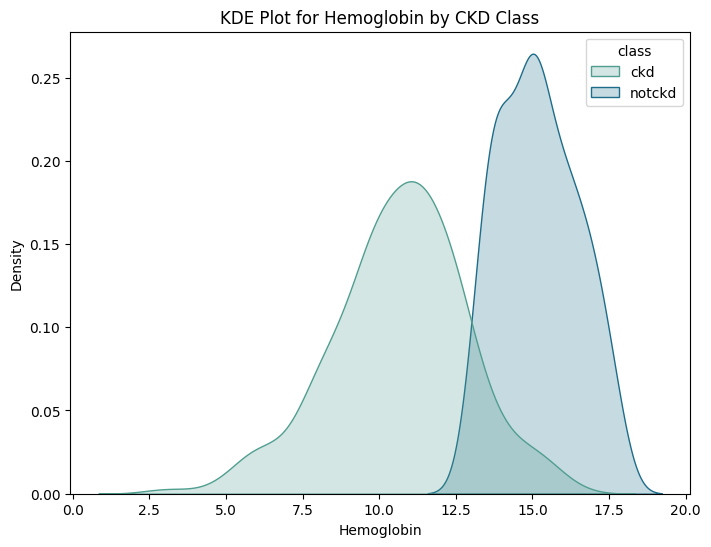

In [568]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=X_kidney, x='hemo', hue=y_kidney['class'], fill=True, common_norm=False, palette='crest')
plt.title("KDE Plot for Hemoglobin by CKD Class")
plt.xlabel("Hemoglobin")
plt.ylabel("Density")
plt.show()


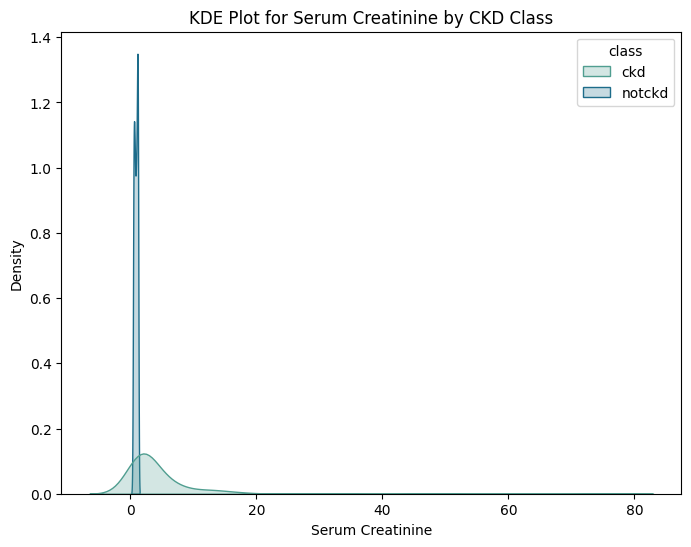

In [569]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=X_kidney, x='sc', hue=y_kidney['class'], fill=True, common_norm=False, palette='crest')
plt.title("KDE Plot for Serum Creatinine by CKD Class")
plt.xlabel("Serum Creatinine")
plt.ylabel("Density")
plt.show()


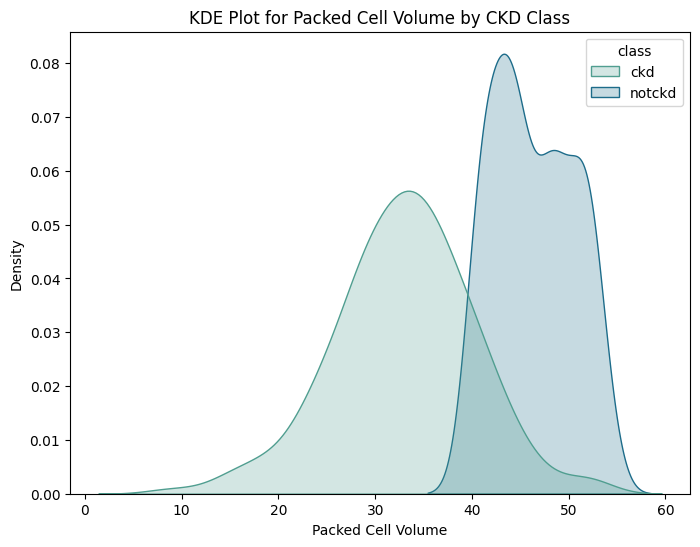

In [570]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=X_kidney, x='pcv', hue=y_kidney['class'], fill=True, common_norm=False, palette='crest')
plt.title("KDE Plot for Packed Cell Volume by CKD Class")
plt.xlabel("Packed Cell Volume")
plt.ylabel("Density")
plt.show()


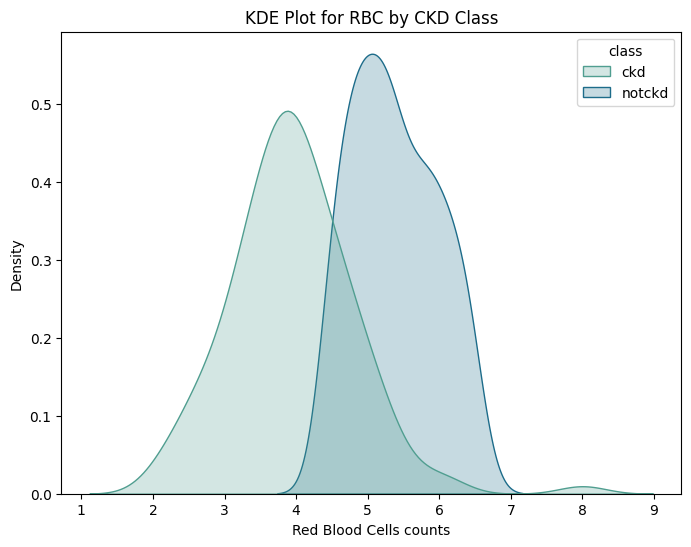

In [571]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=X_kidney, x='rbcc', hue=y_kidney['class'], fill=True, common_norm=False, palette='crest')
plt.title("KDE Plot for RBC by CKD Class")
plt.xlabel("Red Blood Cells counts")
plt.ylabel("Density")
plt.show()


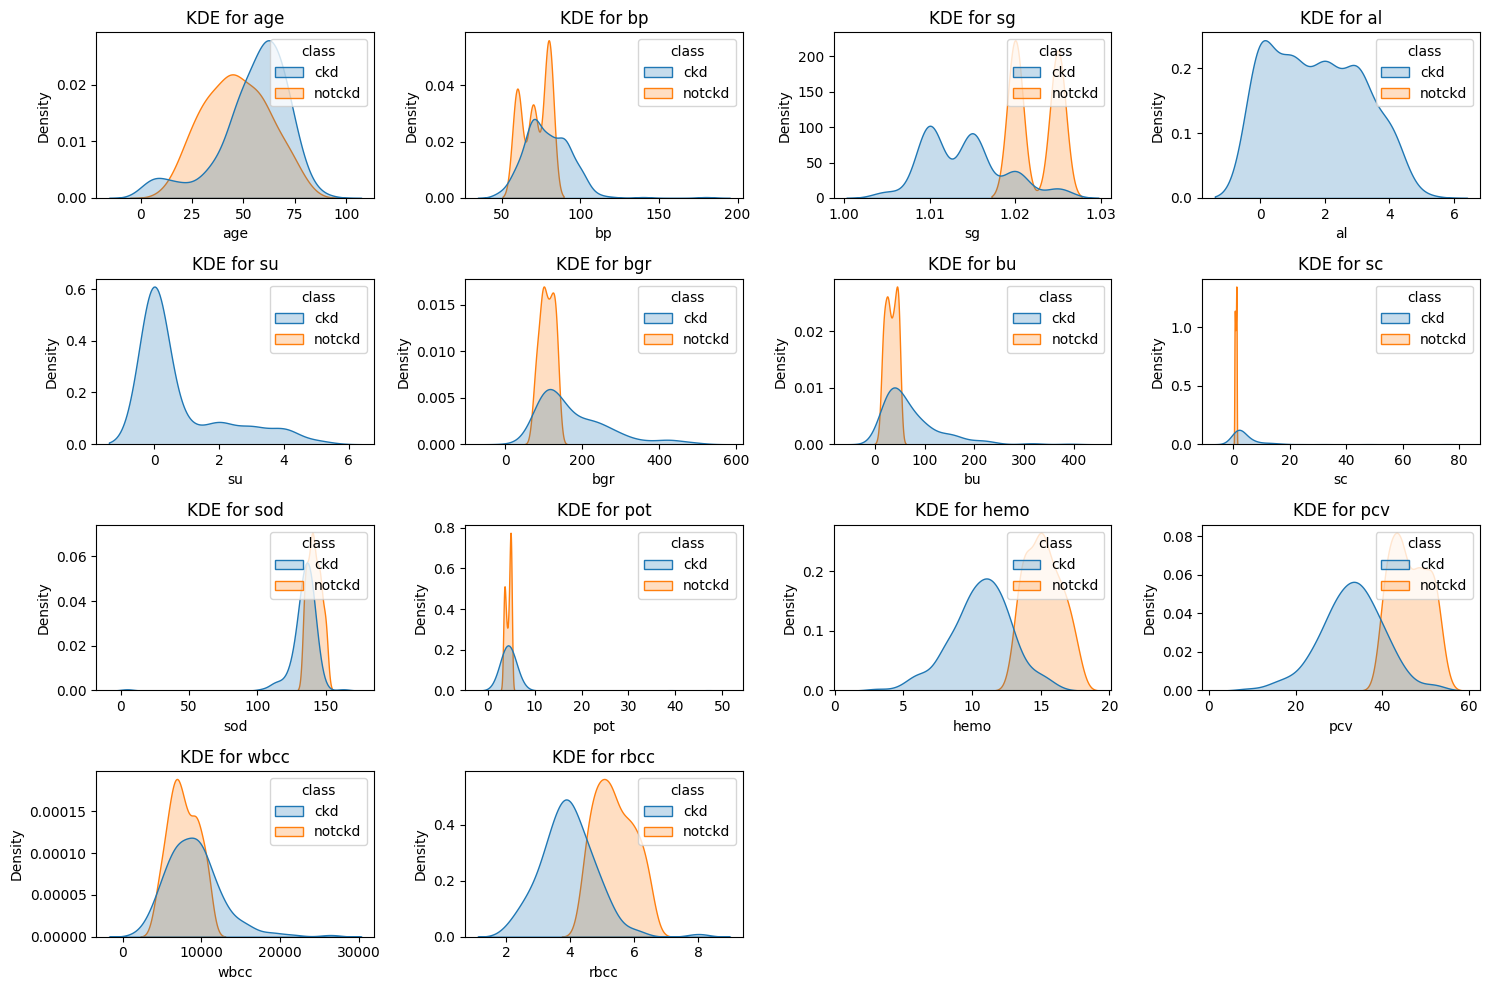

In [572]:
# Create KDE plots for all numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)  # Adjust the number of rows and columns as needed
    sns.kdeplot(data=X_kidney, x=feature, hue=y_kidney['class'], fill=True, common_norm=False)
    plt.title(f"KDE for {feature}")
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


features like blood pressure, blood urea, serum creatinine, albumin, hemoglobin, and rbcc show clear differences between CKD and non-CKD classes, indicating their potential as strong predictors for CKD.

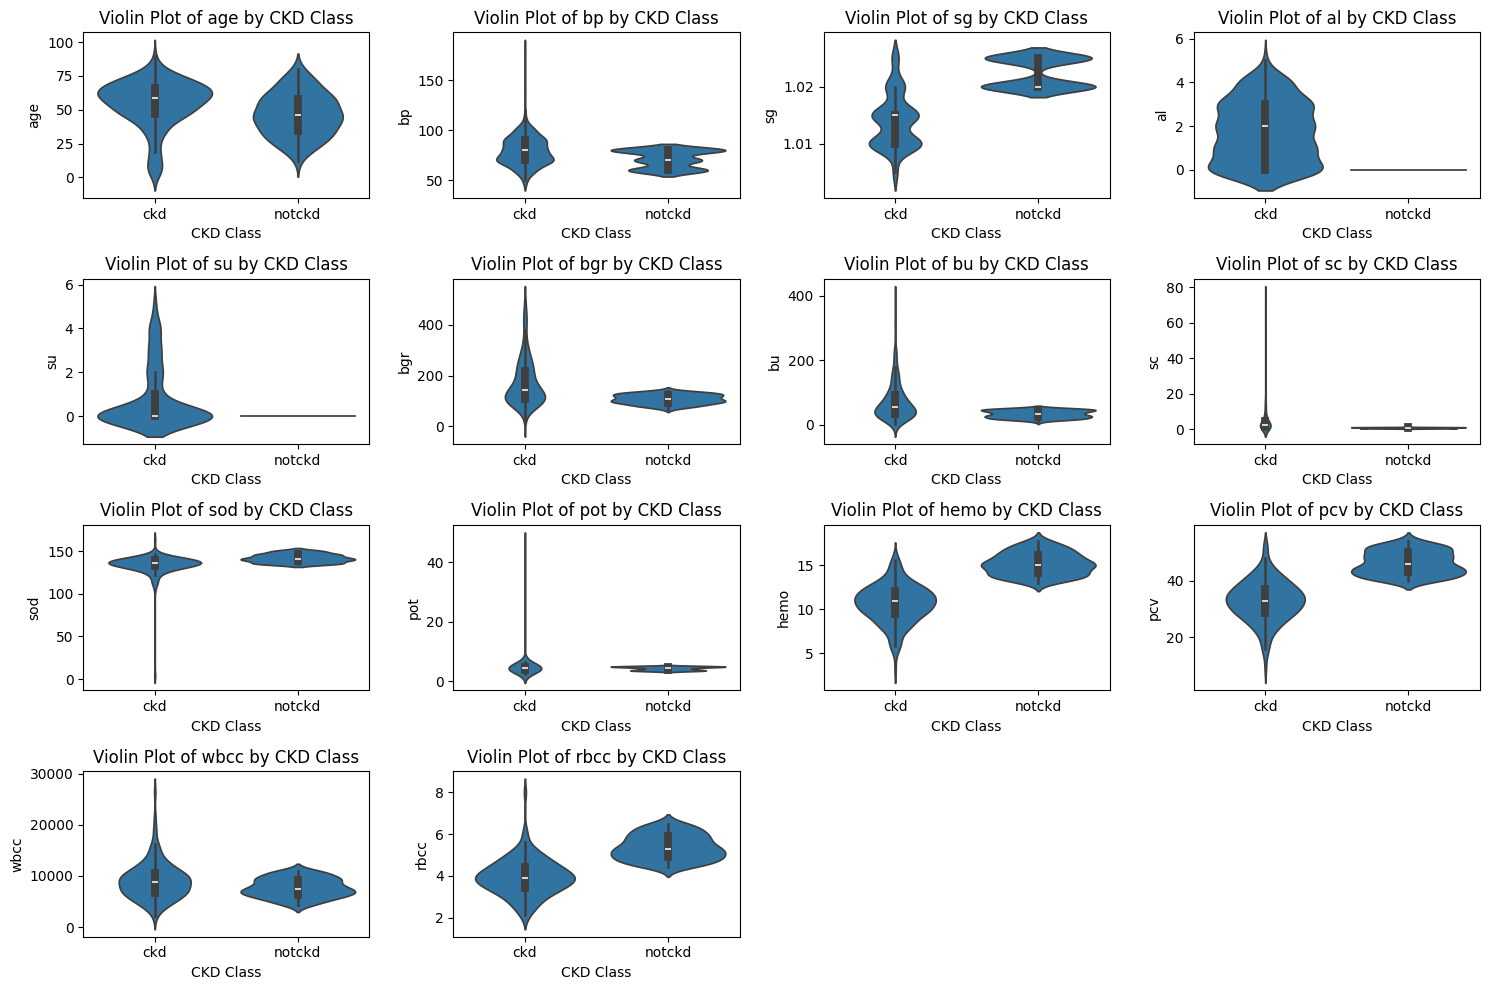

In [573]:
# Create violin plots for each numerical feature against the target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)  # Adjust the number of rows and columns as needed
    sns.violinplot(x=y_kidney['class'], y=X_kidney[feature])
    plt.title(f"Violin Plot of {feature} by CKD Class")
    plt.xlabel("CKD Class")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


features like blood pressure, blood urea, serum creatinine, albumin, hemoglobin, and rbcc differentiate CKD from non-CKD, highlighting them as potential indicators for CKD diagnosis.

Data Preprocessing

In [574]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale only the numerical features
X_kidney[numerical_features] = scaler.fit_transform(X_kidney[numerical_features])

# Verify scaling
print(X_kidney[numerical_features].describe())

                age            bp            sg          al          su  \
count  3.910000e+02  3.880000e+02  3.530000e+02  354.000000  351.000000   
mean   9.994847e-17 -2.380684e-16  2.415443e-15    0.000000    0.000000   
std    1.001281e+00  1.001291e+00  1.001419e+00    1.001415    1.001428   
min   -2.885708e+00 -1.936857e+00 -2.173584e+00   -0.752868   -0.410106   
25%   -5.530393e-01 -4.733701e-01 -1.297699e+00   -0.752868   -0.410106   
50%    2.050779e-01  2.583733e-01  4.540705e-01   -0.752868   -0.410106   
75%    7.590867e-01  2.583733e-01  4.540705e-01    0.727772   -0.410106   
max    2.246163e+00  7.575807e+00  1.329955e+00    2.948733    4.145186   

                bgr            bu          sc           sod           pot  \
count  3.560000e+02  3.810000e+02  383.000000  3.130000e+02  3.120000e+02   
mean  -1.796316e-16 -3.729883e-17    0.000000  2.270105e-17 -7.970832e-17   
std    1.001407e+00  1.001315e+00    1.001308  1.001601e+00  1.001606e+00   
min   -1.591967e

In [575]:
# Drop 'pcv'
X_kidney.drop(columns=['pcv'], inplace=True, errors='ignore')
print("After dropping 'pcv':", X_kidney.columns.tolist())

After dropping 'pcv': ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [576]:

# Drop 'rbcc'
X_kidney.drop(columns=['rbcc'], inplace=True, errors='ignore')
print("After dropping 'rbcc':", X_kidney.columns.tolist())

After dropping 'rbcc': ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [577]:

# Drop 'al'
X_kidney.drop(columns=['al'], inplace=True, errors='ignore')
print("After dropping 'al':", X_kidney.columns.tolist())

After dropping 'al': ['age', 'bp', 'sg', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [578]:
encoder = LabelEncoder()
for col in categorical_features:
    X_kidney[col] = encoder.fit_transform(X_kidney[col])

In [579]:

for feature in numerical_features:
    if feature in X_kidney.columns:
        X_kidney[feature].fillna(X_kidney[feature].mean(), inplace=True)

In [580]:
for feature in categorical_features:
    if feature in X_kidney.columns:
        X_kidney[feature].fillna(X_kidney[feature].mode()[0], inplace=True)

In [581]:
y_kidney['class'] = y_kidney['class'].map({'ckd': 1, 'notckd': 0})

print(y_kidney['class'].value_counts())

class
1    250
0    150
Name: count, dtype: int64


In [582]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kidney, y_kidney, test_size=0.2, random_state=42)

In [583]:
from sklearn.ensemble import RandomForestClassifier

In [584]:
from sklearn.metrics import accuracy_score
# Adjust the shape of y_train and y_test
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
rf = RandomForestClassifier()
# Now fit the model
rf.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

In [585]:
print(f"Random Forest Accuracy: {rf_acc}")

Random Forest Accuracy: 0.975


In [586]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

ROC-AUC Score: 0.9993131868131868


In [587]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)  # 'rbf' is a common kernel choice, you can try 'linear' or 'poly' as well

# Train the SVM model on the SMOTE-resampled training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.95


In [592]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.96      0.96      0.96        52

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [593]:
# import XGBoost
import xgboost as xgb
# import XGBClassifier
from xgboost import XGBClassifier
# Create an XGBoost classifier
modelxgb = xgb.XGBClassifier(random_state=45, use_label_encoder=False,
                             eval_metric='logloss')
# Train the model on the training data
modelxgb.fit(X_train, y_train)
# Make predictions on the validation data
y_pred_xgb = modelxgb.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)
y_pred = modelxgb.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy: 0.9875
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

